# Introduction to Data Science, Lab 1 (9/16)
- Python fundamentals recap (with NumPy, Pandas)
- Modelling with Google Trends data

## Python Essentials
#### *Formatting strings*

In [239]:
# Standard:
print('Hello world from room 650!\nBye.')

Hello world from room 650!
Bye.


In [240]:
# String with argument(s):
room=650
print('Hello world from room {}!'.format(room))
print(f'Hello world from room {room}!')

Hello world from room 650!
Hello world from room 650!


In [241]:
# Multiple arguments:
import math
print('1/3 equals {}, pi equals {}'.format(one_third,math.pi))

1/3 equals 0.3333333333333333, pi equals 3.141592653589793


In [242]:
# Format the argument:
one_third=1/3
print('1/3 equals {}'.format(one_third)) # insert 'one_third' in place of '{}'
print('1/3 equals {:.3f}'.format(one_third)) # specify the number of decimals 
print('1/3 equals {}'.format(round(one_third,3))) # apply the 'round' function directly
print(f'1/3 equals {one_third:.3f}')

1/3 equals 0.3333333333333333
1/3 equals 0.333
1/3 equals 0.333
1/3 equals 0.333


In [243]:
# Choose the order of arguments
print('1/3 equals {1}, pi equals {0}'.format(one_third,math.pi))

1/3 equals 3.141592653589793, pi equals 0.3333333333333333


In [244]:
# Keyword arguments
print('1/3 equals {first}, pi equals {second}'.format(first=one_third,second=math.pi))

1/3 equals 0.3333333333333333, pi equals 3.141592653589793


In [245]:
# Pack characters into a string:
secret=[72,101,108,108,111,32,119,111,114,108,100,33] # ascii values of secret characters
print('-'.join([chr(s) for s in secret])) # '-' specifies how to separate characters

H-e-l-l-o- -w-o-r-l-d-!


#### *Timing*
*Two popular choices are* ***time*** *and* ***timeit***:

In [246]:
import time
print(time.time()) # time since January 1, 1970, 00:00:00 (UTC) in secons, aka UNIX time
print(time.time()/60/60/24/365) # approx. number of years passed

1600144546.1562712
50.740250702576745


In [247]:
start=time.time()
time.sleep(1) # hang for 1 second
end=time.time()
print(end-start)

1.0051460266113281


In [248]:
%%timeit -n 2 # Jupyter notebook usage; include %% to time all the below contents of the current cell
time.sleep(0.1)
time.sleep(0.1)

205 ms ± 1.93 ms per loop (mean ± std. dev. of 7 runs, 2 loops each)


In [249]:
%timeit -n 2 time.sleep(0.1) # include % to time only this line
time.sleep(0.1)
time.sleep(0.1)

101 ms ± 797 µs per loop (mean ± std. dev. of 7 runs, 2 loops each)


#### *Custom functions*

In [250]:
# classic:
def sec2year(sec):
    years=sec/60/60/24//365 # '//' means integer division
    return years

# In python 3+, such simple functions can be defined with 'lambda' 
sec2year_smart=lambda x: x/60/60/24/365

In [251]:
print(sec2year(time.time())) # should be a whole number
print(sec2year_smart(time.time())) # should be rational

50.0
50.74025088306082


In [252]:
# Let's figure out which is faster:
%timeit -n 1000 -r 10 sec2year(time.time())
%timeit -n 1000 -r 10 sec2year_smart(time.time())

476 ns ± 124 ns per loop (mean ± std. dev. of 10 runs, 1000 loops each)
332 ns ± 51.7 ns per loop (mean ± std. dev. of 10 runs, 1000 loops each)


In [253]:
# Some arguments can have default values (should come after any non-default argument)
def divide(num,denom,whole=False):
    return num/denom if not whole else num//denom

In [254]:
# We may choose to pass them explicitly or leave to default
print(divide(10,3,True))
print(divide(10,3,False))
print(divide(10,3))

3
3.3333333333333335
3.3333333333333335


In [255]:
# Additional agruments can be passed by adding *args or **kwargs

def sum_and_shout(num,denom,message):
    result=num+denom
    print(message)
    return result
    
def divide_and_round(num,denom,decimals):
    result=num/denom
    return round(result,decimals)

def multiply_and_sleep(num,denom,sec):
    result=num*denom
    time.sleep(sec)
    return result

def router(num,denom,operation,**kwargs):
    if operation=='sum':
        return sum_and_shout(num,denom,kwargs['message'])
    elif operation=='divide':
        return divide_and_round(num,denom,kwargs['decimals'])
    elif operation=='sleep':
        return multiply_and_sleep(num,denom,kwargs['sec'])

In [256]:
router(5,2,'sum',message='WoooHooo!')

# Compare to:
# def router(num,denom,operation,message,decimals,secs)

# To execute sum via 'router', we would have needed:
# >>> dummy_decimals=3
# >>> dummy_sec=0.5
# >>> router(5,2,'sum',message='WoooHooo!',dummy_decimals,dummy_sec)

# Why don't we just call sum_and_shout(5,2,message='WoooHooo!')?
# The 'operation' flag could be given as a (command line) argumennt,
# so you need to "route" based on 'operation' to execute an appropriate function. 

WoooHooo!


7

#### *Data structures*
- *(1) Lists:*

In [193]:
# Definition
a=[1,3,5,7,9] # explicit
b=[i for i in range(1,10,2)] # range(start,end+1,step)
c=[i for i in range(10)][1:10:2] # slicing [start,end+1,step]
d=[i for i in range(10)][slice(1,10,2)] # slicing (start,end+1,step)
print('{}\n{}\n{}\n{}'.format(a,b,c,d))

[1, 3, 5, 7, 9]
[1, 3, 5, 7, 9]
[1, 3, 5, 7, 9]
[1, 3, 5, 7, 9]


In [206]:
# Append: O(1)
a=[]
a.append(1)
a.append(True)
a.append('WoooHooo!')
print(a) # lists can hold variables of different types

[1, True, 'WoooHooo!']


In [207]:
for n in range(100000):
    if not n%10000:
        start=time.time()
        a.append(n)
        print(f'length: {len(a)}'+f', time: {round(time.time()-start,6)}')
    else:
        a.append(1)

length: 4, time: 2e-06
length: 10004, time: 5e-06
length: 20004, time: 5e-06
length: 30004, time: 8e-06
length: 40004, time: 6e-06
length: 50004, time: 7e-06
length: 60004, time: 7e-06
length: 70004, time: 4e-06
length: 80004, time: 8e-06
length: 90004, time: 8e-06


In [208]:
# Remove: O(n)
a=list(range(100001))
for n in range(100001):
    if not n%10000:
        start=time.time()
        a.remove(n)
        print(f'length: {len(a)}'+f', time: {round(time.time()-start,6)}')
    else:
        a.remove(n)

length: 100000, time: 7.1e-05
length: 90000, time: 3.6e-05
length: 80000, time: 4e-05
length: 70000, time: 4.6e-05
length: 60000, time: 2.8e-05
length: 50000, time: 3.5e-05
length: 40000, time: 3.6e-05
length: 30000, time: 1.6e-05
length: 20000, time: 2.8e-05
length: 10000, time: 1e-05
length: 0, time: 4e-06


In [214]:
# Other commonly used methods:
a=[2,1,5,4,3]
print(a.pop()) # removes and returns the last element, O(1)
a=[2,1,5,4,3]
print(sorted(a)) # sorts the list, O(nlogn)
a=[2,1,5,4,3]
print('WoooHooo' in a) # checks if an object is in the list, O(n)

3
[1, 2, 3, 4, 5]
False


- (2) *Dictionaries:*

In [229]:
# Definition
a={'a':1,'b':True,'c':-10}
print(a)

{'a': 1, 'b': True, 'c': -10}


In [230]:
# Insertion, O(1) (on average)
a['d']=5
print(a)

{'a': 1, 'b': True, 'c': -10, 'd': 5}


In [231]:
# Deletion, O(1) (on average)
del a['b']
print(a)

{'a': 1, 'c': -10, 'd': 5}


In [232]:
# Check, O(1) (on average)
print('z' in a) # or
print('z' in a.keys())

False
False


In [235]:
# Access, O(1) (on average)
print(a['d'])

5


In [233]:
# Sort by values, O(nlogn)
print(sorted(a.items(),key=lambda x:x[1]))

[('c', -10), ('a', 1), ('d', 5)]


In [238]:
# Why are dictionaries useful?
# (1) Reduced complexity of most operations compared to having two lists;
# (2) Convenience/Interpretability of the code

# Exercise 1 (Leetcode 22):
# Write a function 'single(a)' that takes an integer list/array 'a', in which
# all elements appear exactly twice except for one element that appears once.
# Output this one integer in O(n) complexity (n is the list length).
# Example: single([0,4,3,3,0]) outputs 4.

# Exercise 2 (Leetcode 451):
# Write a function 'frequency(s)' that sorts charcters of a string 's' in decreasing order
# based on the frequency of characters.
# Example: frequency("data") outputs "aadt" (or "aatd")

# Another good example is Leetcode 997.

#### *Other useful built-in functions*

In [269]:
# s.split(char): breaks a string s into a list of strings separated by char
s='Hello world from room 650!'
print(s.split(' '))

['Hello', 'world', 'from', 'room', '650!']


In [270]:
# s.join(list of strings): the opposite of split; joins all strings in the list and places s in between each pair
strs=['Hello', 'world', 'from', 'room', '650!']
print(' '.join(strs))

Hello world from room 650!


In [264]:
# sum(iterable): sums elements of a valid iterable (e.g. list, tuple, numpy array, etc.)
print(sum([1,2,3,4,5]))

15


In [265]:
# enumerate(iterable):  outputs an <enumerate> object with [index,element] pairs of an iterable
print([(i,v) for i,v in enumerate(['zero','one','two','three','four'])])

[(0, 'zero'), (1, 'one'), (2, 'two'), (3, 'three'), (4, 'four')]


In [268]:
# zip(iterable,iterable): outputs a <zip> with pairs of elements from iterables (must be of the same length)
vec_1=[1,2,3]
vec_2=[-1,0,1]
print(sum([a*b for a,b in zip(vec_1,vec_2)])) # dot product of vec_1 and vec_2

2


In [271]:
# Others like type(), len(), min(), max(), etc.

#### NumPy Module
NumPy is a python library for efficient and convenient work with arrays (ndarrays).
Unlike python lists, which in principle serve the same `purpose, numpy arrays are stored in contiguous memory space, making referencing/accessing faster.

In [294]:
# Initialization from list:
a=np.array([[1,1,1],[2,2,2]])
print(f'array:\n {a}\n')
print(f'shape: {a.shape}')

array:
 [[1 1 1]
 [2 2 2]]

shape: (2, 3)


In [347]:
# Initialization from NumPy methods:
b=np.arange(10) # the same as range() but returns a ndarray
c=np.ones((2,3)) # make an array of all ones with a given shape
d=np.zeros((2,3)) # make an array of all zeros with a given shape
e=np.full((2,3),7) # make an array of all sevens with a given shape
print(f'{b}\n\n{c}\n\n{d}\n\n{e}')

[0 1 2 3 4 5 6 7 8 9]

[[1. 1. 1.]
 [1. 1. 1.]]

[[0. 0. 0.]
 [0. 0. 0.]]

[[7 7 7]
 [7 7 7]]


In [312]:
# Reshaping arrays
print(f'{a.reshape((3,2))}\n') # traverses entries in order; not a transpose operation
print(a.reshape(-1)) # flattening out

[[1 1]
 [1 2]
 [2 2]]

[1 1 1 2 2 2]


In [278]:
import numpy as np

# Arithmetic works better:
print([1,2,3]*3) # concatenates [1,2,3] with itself 3 times
print(np.array([1,2,3])*3) # elementwise product

[1, 2, 3, 1, 2, 3, 1, 2, 3]
[3 6 9]


In [285]:
# Elementwise addition:
print(np.array([1,2,3])+3) # or
print(np.array([1,2,3])+np.array([3,3,3]))

[4 5 6]
[4 5 6]


In [281]:
# Not supported for lists:
print([1,2,3]+3)

[1, 2, 3]


In [316]:
# Saving/Loading arrays:
a=np.array([1,2,3,4,5])
np.save('IDS2020/best_array_ever.npy',a)
a=np.load('IDS2020/best_array_ever.npy')
print(a)

[1 2 3 4 5]


In [317]:
# Other useful functions:
# np.mean(array,axis=?): average value across along a given axis,
# np.std(array,axis=?): standard deviation along a given axis,
# np.dot(array,array): dot product of two 1-dimensional arrays of the same length,
# np.matmul(array, array): matrix multiplication of two 2-dimensional arrays,
# np.nonzero(array): returns indices of nonzero elements of the array,
# np.where(condition(array)): returns indices of the array where elements satisfy the condition,
# np.argsort(array): returns indices in order that sorts the array.

#### NumPy Random

In [388]:
# Random permutation:
identity=np.arange(20)
sigma=np.random.permutation(identity)
print(sigma)
print(identity[sigma]) # the same

# Exercise: bring sigma back to identity; i.e find its inverse:
# >>> sigma_inverse=TODO
# >>> sigma[sigma_inverse]==identity
# >>> True

print(sigma[sigma.argsort()])

[19 14  1  8 15 16  4 17 13  9 10  7  6  0 11  2  3 12  5 18]
[19 14  1  8 15 16  4 17 13  9 10  7  6  0 11  2  3 12  5 18]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


In [356]:
# Random choice:
i_hate_threes=[0 if i==3 else 1/9 for i in range(10)]
np.random.choice(a=range(10),replace=True,size=20,p=i_hate_threes) # 'p' gives probabilities of choices in 'a'

array([1, 1, 5, 2, 8, 5, 7, 4, 4, 5, 8, 5, 9, 4, 2, 7, 2, 9, 4, 5])

In [387]:
# Random distributions:
# np.random.normal(loc=0,scale=1,size=(5,5))
# np.random.poisson(lam=6,size=1)
# np.random.binomial(n=5,p=0.5)

[2.      2.5     2.      3.      2.8125  2.9375  2.70312 2.71094 2.59375
 2.67188 2.69043 2.72217 2.71875 2.71387 2.71863 2.71759 2.71661 2.7129 ]


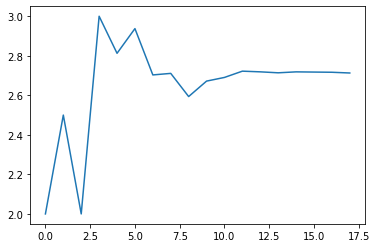

In [423]:
# Exercise: You add Unif(0,1) variables until your sum exceeds 1.
# How many random variables, on average, will there be in your sum?

# Repeat this procedure many times, average the results and guess the answer.

averages=[]
repeats=[2**i for i in range(18)]
for repeat in repeats:
    results=[]
    for n in range(repeat):
        num=0
        my_sum=0
        while my_sum<1:
            num+=1
            my_sum+=np.random.uniform(0,1)
        results.append(num)
    averages.append(np.mean(results))
print(np.round(averages,5))
res=plt.plot(range(len(repeats)),averages)

In [367]:
# Reproducibility:
np.random.seed(22) # run this before each random generation to replicate the same "random" output
print('original: {}'.format(np.random.uniform(0,1)))
np.random.seed(22)
print('original: {}'.format(np.random.uniform(0,1)))
np.random.seed(22)
print('original: {}'.format(np.random.uniform(0,1)))
print('different: {}'.format(np.random.uniform(0,1))) # seed not set
np.random.seed(22)
print("original: {}".format(np.random.uniform(0,1)))
np.random.seed(23)
print('different: {}'.format(np.random.uniform(0,1))) # seed set to a different value

original: 0.20846053735884262
original: 0.20846053735884262
original: 0.20846053735884262
different: 0.4816810617633659
original: 0.20846053735884262
different: 0.5172978838465893


#### Pandas
A Python library for efficient storing, handlng, managing panel data.